In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from datetime import datetime
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
rawData = pd.read_csv("WaterStocks.csv", parse_dates=True)
adjData = pd.read_csv("WaterStocksAdj.csv", parse_dates=True)

In [3]:
for i in range(0, 3020):
    rawData['PRC'][i] = adjData['26463'][i]
for i in range(3020, 6040):
    rawData['PRC'][i] = adjData['52898'][i-3020]
for i in range(6040, 9060):
    rawData['PRC'][i] = adjData['71475'][i-6040]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
rawData['nplog'] = np.log(abs(rawData.PRC))
rawData.tail()

PERMNO      date TICKER                    COMNAM  PERMCO  BIDLO  ASKHI  \
9055   71475  20081224    AWR  AMERICAN STATES WATER CO    4350  32.16  33.11   
9056   71475  20081226    AWR  AMERICAN STATES WATER CO    4350  32.28  33.04   
9057   71475  20081229    AWR  AMERICAN STATES WATER CO    4350  30.36  32.71   
9058   71475  20081230    AWR  AMERICAN STATES WATER CO    4350  30.30  32.33   
9059   71475  20081231    AWR  AMERICAN STATES WATER CO    4350  30.37  33.36   

         PRC     VOL       RET    ...     SHROUT  OPENPRC  NUMTRD      RETX  \
9055  16.325   27200  0.012717    ...      17289    32.16     NaN  0.012717   
9056  16.355   38600  0.001838    ...      17289    32.62     NaN  0.001838   
9057  15.390  170800 -0.059003    ...      17289    32.71     NaN -0.059003   
9058  15.150  484500 -0.015595    ...      17289    31.02     NaN -0.015595   
9059  16.490  321700  0.088449    ...      17289    30.40     NaN  0.088449   

        vwretd    vwretx    ewretd    ewretx    sprtrn     nplog  
9055  0.004514  0.004069  0.005042  0.004547  0.005781  2.792698  
9056  0.007191  0.007157  0.011107  0.010885  0.005356  2.794534  
9057 -0.004366 -0.004747 -0.015163 -0.015756 -0.003873  2.733718  
9058  0.024766  0.024608  0.021418  0.021245  0.024407  2.718001  
9059  0.017405  0.017386  0.034456  0.034415  0.014158  2.802754  

[5 rows x 22 columns]

In [5]:
permno = [26463, 52898, 71475]

ind = rawData.PERMNO == permno[0]
ctwsData = rawData[ind]

ind = rawData.PERMNO == permno[1]
wtrData = rawData[ind]

ind = rawData.PERMNO == permno[2]
awrData = rawData[ind]

In [6]:
ctws_series = pd.Series(abs(ctwsData.nplog))
wtr_series = pd.Series(wtrData.nplog)
awr_series = pd.Series(awrData.nplog)

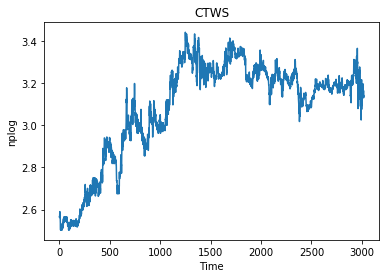

In [7]:
plt.plot(ctws_series)
plt.title('CTWS')
plt.xlabel('Time')
plt.ylabel('nplog');

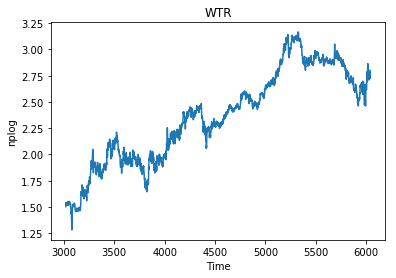

In [8]:
plt.plot(wtr_series)
plt.title('WTR')
plt.xlabel('Time')
plt.ylabel('nplog');

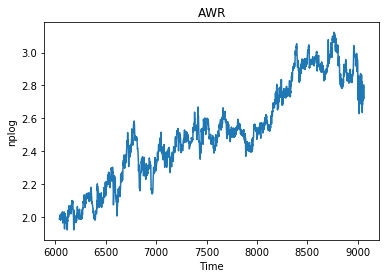

In [9]:
plt.plot(awr_series)
plt.title('AWR')
plt.xlabel('Time')
plt.ylabel('nplog');

__Separate Test Data and Trading Data__

In [10]:
rawData_first = rawData.loc[rawData['date'] < 20000101]
rawData_last = rawData.loc[rawData['date'] >= 20000101]

In [11]:
rawData_first.head()

PERMNO      date TICKER                         COMNAM  PERMCO   BIDLO  \
0   26463  19970102   CTWS  CONNECTICUT WATER SERVICE INC    1191  29.000   
1   26463  19970103   CTWS  CONNECTICUT WATER SERVICE INC    1191  29.250   
2   26463  19970106   CTWS  CONNECTICUT WATER SERVICE INC    1191  29.250   
3   26463  19970107   CTWS  CONNECTICUT WATER SERVICE INC    1191  29.125   
4   26463  19970108   CTWS  CONNECTICUT WATER SERVICE INC    1191  29.125   

   ASKHI        PRC   VOL       RET    ...     SHROUT  OPENPRC  NUMTRD  \
0   30.0  13.000000  1216  0.000000    ...       3011   29.250     6.0   
1   30.0  13.000000  1850  0.000000    ...       3011   30.000     5.0   
2   30.0  13.000000  3226  0.000000    ...       3011   29.250     8.0   
3   30.0  13.222222  2233  0.017094    ...       3011   29.125     5.0   
4   30.0  13.333333  2252  0.008403    ...       3011   29.125     6.0   

       RETX    vwretd    vwretx    ewretd    ewretx    sprtrn     nplog  
0  0.000000 -0.007358 -0.007403  0.001325  0.001294 -0.005036  2.564949  
1  0.000000  0.013491  0.013451  0.012477  0.012428  0.014952  2.564949  
2  0.000000  0.000697  0.000680  0.005099  0.005086 -0.000508  2.564949  
3  0.017094  0.007357  0.007305  0.007338  0.007329  0.007463  2.581899  
4  0.008403 -0.003754 -0.003971  0.004376  0.004304 -0.006399  2.590267  

[5 rows x 22 columns]

In [12]:
permno = [26463, 52898, 71475]

ind = rawData_first.PERMNO == permno[0]
ctwsData_first = rawData_first[ind]

ind = rawData_first.PERMNO == permno[1]
wtrData_first = rawData_first[ind]

ind = rawData_first.PERMNO == permno[2]
awrData_first = rawData_first[ind]

In [13]:
permno = [26463, 52898, 71475]

ind = rawData_last.PERMNO == permno[0]
ctwsData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[1]
wtrData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[2]
awrData_last = rawData_last[ind]

In [14]:
rawData_first.reset_index(inplace=True)
rawData_last.reset_index(inplace=True)

ctwsData_first.reset_index(inplace=True)
wtrData_first.reset_index(inplace=True)
awrData_first.reset_index(inplace=True)
ctwsData_last.reset_index(inplace=True)
wtrData_last.reset_index(inplace=True)
awrData_last.reset_index(inplace=True)

__Exhibit 1 (Daily returns & Volume)__

__Returns__

In [15]:
ctwsData.RET.describe()

count    3020.000000
mean        0.000573
std         0.021245
min        -0.131115
25%        -0.009769
50%         0.000000
75%         0.010433
max         0.143689
Name: RET, dtype: float64

In [16]:
wtrData.RET.describe()

count    3020.000000
mean        0.000716
std         0.019450
min        -0.105691
25%        -0.009724
50%         0.000000
75%         0.010121
max         0.131258
Name: RET, dtype: float64

In [17]:
awrData.RET.describe()

count    3020.000000
mean        0.000624
std         0.020173
min        -0.097285
25%        -0.010573
50%         0.000000
75%         0.011236
max         0.096287
Name: RET, dtype: float64

__Volume__

In [18]:
ctwsData.VOL.describe()

count      3020.000000
mean       9956.748344
std       25544.115451
min           0.000000
25%        3459.000000
50%        6785.500000
75%       11747.250000
max      966638.000000
Name: VOL, dtype: float64

In [19]:
wtrData.VOL.describe()

count    3.020000e+03
mean     3.345267e+05
std      4.832983e+05
min      2.500000e+03
25%      4.010000e+04
50%      1.275500e+05
75%      4.258750e+05
max      5.578600e+06
Name: VOL, dtype: float64

In [20]:
awrData.VOL.describe()

count      3020.000000
mean      49990.043709
std       60350.785876
min         200.000000
25%       11900.000000
50%       27000.000000
75%       67125.000000
max      626300.000000
Name: VOL, dtype: float64

__Buy and Hold Return__

In [21]:
CTWS_hold = ((ctwsData_last.PRC.values[-2:-1][0] - ctwsData_last.PRC[0]) / ctwsData_last.PRC[0])
print("The buy and hold return for CTWS is: "+"{:.2%}".format(CTWS_hold));

The buy and hold return for CTWS is: 10.06%


In [22]:
WTR_hold = ((wtrData_last.PRC.values[-2:-1][0] - wtrData_last.PRC[0]) / wtrData_last.PRC[0])
print("The buy and hold return for WTR is: "+"{:.2%}".format(WTR_hold));

The buy and hold return for WTR is: 145.86%


In [23]:
AWR_hold = ((awrData_last.PRC.values[-2:-1][0] - awrData_last.PRC[0]) / awrData_last.PRC[0])
print("The buy and hold return for AWR is: "+"{:.2%}".format(AWR_hold));

The buy and hold return for AWR is: 26.47%


__CTWS test for unit-root__

In [24]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ctws_series, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.440644
p-value: 0.810893
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__WTR test for unit-root__

In [25]:
result = adfuller(wtr_series, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.872175
p-value: 0.896953
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__AWR test for unit-root__

In [26]:
result = adfuller(awr_series, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.538629
p-value: 0.833599
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__Looking at first differences__

In [27]:
first_dif_ctws = ctwsData.nplog.diff()
first_dif_wtr = wtrData.nplog.diff()
first_dif_awr = awrData.nplog.diff()

__CTWS first difference test__

In [28]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(first_dif_ctws[1:], maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -47.065015
p-value: 0.000000
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__WTR first difference test__

In [29]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(first_dif_wtr[1:], maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -54.926553
p-value: 0.000000
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__AWR first difference test__

In [30]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(first_dif_awr[1:], maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -58.822742
p-value: 0.000000
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__Testing for Cointegration__

In [31]:
reshaped_ctws = ctws_series.values.reshape(3020, 1)
reshaped_wtr = wtr_series.values.reshape(3020, 1)
reshaped_awr = awr_series.values.reshape(3020, 1)

__CTWS - WTR__

In [32]:
ols_result = sm.OLS(reshaped_ctws, reshaped_wtr).fit()    
result = adfuller(ols_result.resid, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.850901
p-value: 0.061134
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__CTWS - AWR__

In [33]:
ols_result = sm.OLS(reshaped_ctws, reshaped_awr).fit()    
result = adfuller(ols_result.resid, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.486500
p-value: 0.012465
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__WTR - AWR__

In [34]:
ols_result = sm.OLS(reshaped_wtr, reshaped_awr).fit()    
result = adfuller(ols_result.resid, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.954160
p-value: 0.003084
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__Error Correction Model__

__Between CTWS and WTR__

In [47]:
from sklearn.linear_model import LinearRegression

ctws_first_series = pd.Series(abs(ctwsData_first.nplog))
wtr_first_series = pd.Series(wtrData_first.nplog)
awr_first_series = pd.Series(awrData_first.nplog)

reshaped_ctws_first = ctws_first_series.values.reshape(757, 1)
reshaped_wtr_first = wtr_first_series.values.reshape(757, 1)
reshaped_awr_first = awr_first_series.values.reshape(757, 1)

In [53]:
ctws_result = sm.OLS(reshaped_ctws_first, reshaped_wtr_first).fit()

model_ctws = LinearRegression(fit_intercept=True)
int_ctws = model_ctws.fit(reshaped_ctws_first, reshaped_wtr_first).intercept_
coef_ctws = model_ctws.fit(reshaped_ctws_first, reshaped_wtr_first).coef_
ctws_result = sm.OLS(reshaped_ctws_first, reshaped_wtr_first).fit().resid
result_ctws = reshaped_ctws_first - int_ctws - coef_ctws * reshaped_wtr_first

result_ctws = result_ctws[2:]
n = reshaped_ctws_first.shape[0] - 2
dy = reshaped_ctws_first[:-2]
dx = reshaped_wtr_first[:-2]

X = np.empty((n, 3))
X[:,0] = result_ctws.reshape(n,)
X[:,1] = dy.reshape(n,)
X[:,2] = dx.reshape(n,)

reg_ctws = sm.OLS(dy, X).fit()
print(reg_ctws.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.161e+32
Date:                Thu, 28 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:04:33   Log-Likelihood:                 23953.
No. Observations:                 755   AIC:                        -4.790e+04
Df Residuals:                     752   BIC:                        -4.789e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.553e-15   2.76e-15      1.289      0.1

_Equation(6) for each pair_

CTWS & WTR

In [128]:
print(f"Equation(6) for CTWS is log(CTWS)=alpha+beta_1log(WTR)+epsilon")

Equation(6) for CTWS is log(CTWS)=alpha+beta_1log(WTR)+epsilon


WTR and AWR

In [129]:
print(f"Equation(6) for WTR is log(WTR)=alpha+beta_1log(AWR)+epsilon")

Equation(6) for WTR is log(WTR)=alpha+beta_1log(AWR)+epsilon


CTWS and AWR

In [130]:
print(f"Equation(6) for CTWS is log(CTWS)=alpha+beta_1log(AWR)+epsilon")

Equation(6) for CTWS is log(CTWS)=alpha+beta_1log(AWR)+epsilon


_Equation(7) for each pair_

CTWS and WTR

In [131]:
from sklearn.linear_model import LinearRegression

ctws_first_series = pd.Series(abs(ctwsData_first.nplog))
wtr_first_series = pd.Series(wtrData_first.nplog)
awr_first_series = pd.Series(awrData_first.nplog)

reshaped_ctws_first = ctws_first_series.values.reshape(757, 1)
reshaped_wtr_first = wtr_first_series.values.reshape(757, 1)
reshaped_awr_first = awr_first_series.values.reshape(757, 1)

model_ctws = LinearRegression(fit_intercept=True)
int_ctws = model_ctws.fit(reshaped_ctws_first, reshaped_wtr_first).intercept_
coef_ctws = model_ctws.fit(reshaped_ctws_first, reshaped_wtr_first).coef_
results = (int_ctws[0], coef_ctws[0][0])

In [132]:
print(f"Equation(7) for CTWS is log(CTWS)={results[0]:0.4f}{results[1]: 0.4f}log(WTR)")

Equation(7) for CTWS is log(CTWS)=-0.6036 0.8873log(WTR)


WTR and AWR

In [133]:
model_wtr = LinearRegression(fit_intercept=True)
int_wtr = model_wtr.fit(reshaped_wtr_first, reshaped_awr_first).intercept_
coef_wtr = model_wtr.fit(reshaped_wtr_first, reshaped_awr_first).coef_
results = (int_wtr[0], coef_wtr[0][0])

In [134]:
print(f"Equation(7) for WTR is log(WTR)={results[0]:0.4f} +{results[1]: 0.4f}log(AWR)")

Equation(7) for WTR is log(WTR)=1.3488 + 0.4375log(AWR)


CTWS and AWR

In [135]:
model_awr = LinearRegression(fit_intercept=True)
int_awr = model_ctws.fit(reshaped_awr_first, reshaped_ctws_first).intercept_
coef_awr = model_ctws.fit(reshaped_awr_first, reshaped_ctws_first).coef_
results = (int_wtr[0], coef_wtr[0][0])

In [136]:
print(f"Equation(7) for CTWS is log(CTWS)={results[0]:0.4f} +{results[1]: 0.4f}log(AWR)")

Equation(7) for CTWS is log(CTWS)=1.3488 + 0.4375log(AWR)


_Running Equations 7&8 for each pair_

In [137]:
rawData_last['predicted'] = 0.0
predicted_value_ctws = np.empty(2263)
for i in range(0, 2263):
    predicted_value_ctws[i] = (int_awr[0] + (coef_awr[0,0] * awrData_last.loc[i]['nplog']))
    rawData_last.at[i, 'predicted'] = predicted_value_ctws[i]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
predicted_value_wtr = np.empty(2263)
for i in range(0, 2263):
    predicted_value_wtr[i] = (int_ctws[0] + (coef_ctws[0,0] * ctwsData_last.loc[i]['nplog']))
    rawData_last.at[(i+2263), 'predicted'] = predicted_value_wtr[i]

In [139]:
predicted_value_awr = np.empty(2263)
for i in range(0, 2263):
    predicted_value_awr[i] = (int_wtr[0] + (coef_wtr[0,0] * wtrData_last.loc[i]['nplog']))
    rawData_last.at[(i+4526), 'predicted'] = predicted_value_awr[i]

In [140]:
rawData_last['dif_predicted'] = 0.0

for i in range(0, 6789):
    rawData_last['dif_predicted'][i] = rawData_last['nplog'][i] - rawData_last['predicted'][i]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Tyson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

In [141]:
permno = [26463, 52898, 71475]

ind = rawData_last.PERMNO == permno[0]
ctwsData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[1]
wtrData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[2]
awrData_last = rawData_last[ind]

In [142]:
multiple = [0.25, 0.50, 0.75]

CTWS $\sigma_\epsilon$ value

In [143]:
e_ctws = np.sqrt(np.var((ctwsData_last.dif_predicted)))

upper_bound_25_ctws = multiple[0] * e_ctws
lower_bound_25_ctws = -multiple[0] * e_ctws
upper_bound_50_ctws = multiple[1] * e_ctws
lower_bound_50_ctws = -multiple[1] * e_ctws
upper_bound_75_ctws = multiple[2] * e_ctws
lower_bound_75_ctws = -multiple[2] * e_ctws

WTR $\sigma_\epsilon$ value

In [144]:
e_wtr = np.sqrt(np.var((wtrData_last.dif_predicted)))

upper_bound_25_wtr = multiple[0] * e_wtr
lower_bound_25_wtr = -multiple[0] * e_wtr
upper_bound_50_wtr = multiple[1] * e_wtr
lower_bound_50_wtr = -multiple[1] * e_wtr
upper_bound_75_wtr = multiple[2] * e_wtr
lower_bound_75_wtr = -multiple[2] * e_wtr

AWR $\sigma_\epsilon$ value

In [145]:
e_awr = np.sqrt(np.var((awrData_last.dif_predicted)))

upper_bound_25_awr = multiple[0] * e_awr
lower_bound_25_awr = -multiple[0] * e_awr
upper_bound_50_awr = multiple[1] * e_awr
lower_bound_50_awr = -multiple[1] * e_awr
upper_bound_75_awr = multiple[2] * e_awr
lower_bound_75_awr = -multiple[2] * e_awr

CTWS strategy graph

In [146]:
y = pd.Series(ctwsData_last.dif_predicted)

upper = np.empty(ctwsData_last.shape)
upper.fill(upper_bound_25_ctws)
lower = np.empty(ctwsData_last.shape)
lower.fill(lower_bound_25_ctws)

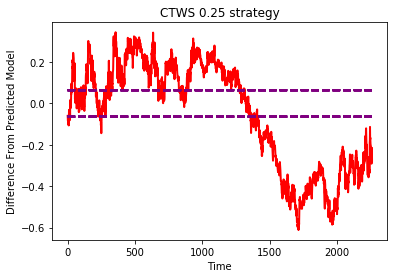

In [147]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('CTWS 0.25 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [148]:
y = pd.Series(ctwsData_last.dif_predicted)

upper = np.empty(ctwsData_last.shape)
upper.fill(upper_bound_50_ctws)
lower = np.empty(ctwsData_last.shape)
lower.fill(lower_bound_50_ctws)

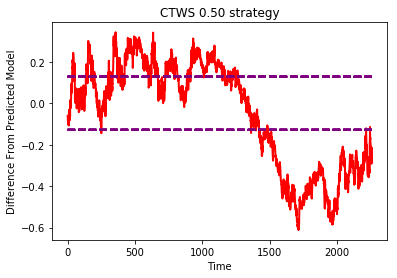

In [149]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('CTWS 0.50 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [150]:
y = pd.Series(ctwsData_last.dif_predicted)

upper = np.empty(ctwsData_last.shape)
upper.fill(upper_bound_75_ctws)
lower = np.empty(ctwsData_last.shape)
lower.fill(lower_bound_75_ctws)

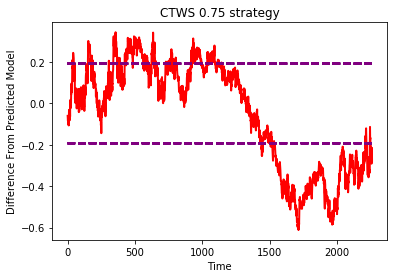

In [151]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('CTWS 0.75 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

WTR Strategy Graph

In [152]:
wtrData_last.reset_index(inplace=True)
y = pd.Series(wtrData_last.dif_predicted)

upper = np.empty(wtrData_last.shape)
upper.fill(upper_bound_25_wtr)
lower = np.empty(wtrData_last.shape)
lower.fill(lower_bound_25_wtr)

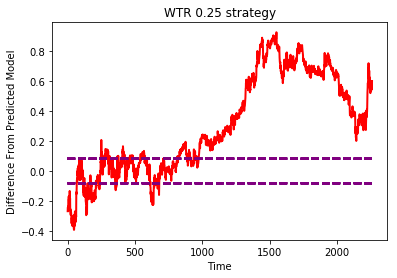

In [153]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('WTR 0.25 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [154]:
y = pd.Series(wtrData_last.dif_predicted)

upper = np.empty(wtrData_last.shape)
upper.fill(upper_bound_50_wtr)
lower = np.empty(wtrData_last.shape)
lower.fill(lower_bound_50_wtr)

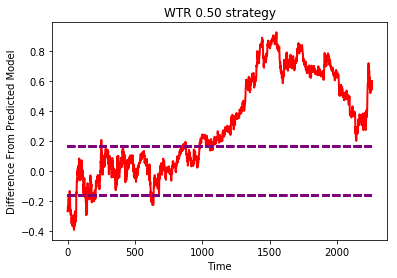

In [155]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('WTR 0.50 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [156]:
y = pd.Series(wtrData_last.dif_predicted)

upper = np.empty(wtrData_last.shape)
upper.fill(upper_bound_75_wtr)
lower = np.empty(wtrData_last.shape)
lower.fill(lower_bound_75_wtr)

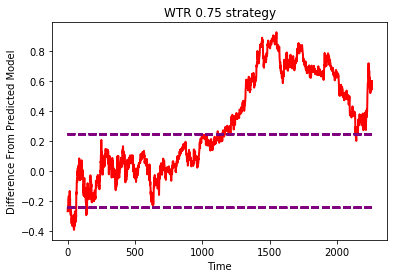

In [157]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('WTR 0.75 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

AWR Strategy Graph

In [158]:
awrData_last.reset_index(inplace=True)
y = pd.Series(awrData_last.dif_predicted)

upper = np.empty(awrData_last.shape)
upper.fill(upper_bound_25_awr)
lower = np.empty(awrData_last.shape)
lower.fill(lower_bound_25_awr)

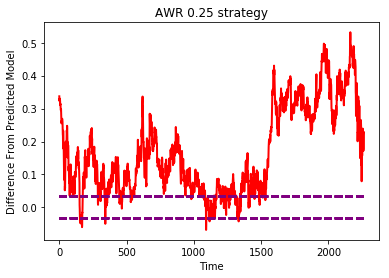

In [159]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('AWR 0.25 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [160]:
y = pd.Series(awrData_last.dif_predicted)

upper = np.empty(awrData_last.shape)
upper.fill(upper_bound_50_awr)
lower = np.empty(awrData_last.shape)
lower.fill(lower_bound_50_awr)

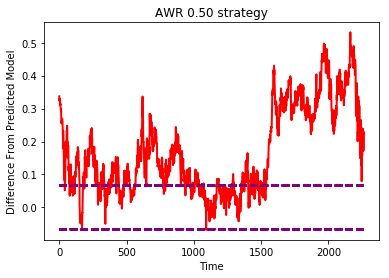

In [161]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('AWR 0.50 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [162]:
y = pd.Series(awrData_last.dif_predicted)

upper = np.empty(awrData_last.shape)
upper.fill(upper_bound_75_awr)
lower = np.empty(awrData_last.shape)
lower.fill(lower_bound_75_awr)

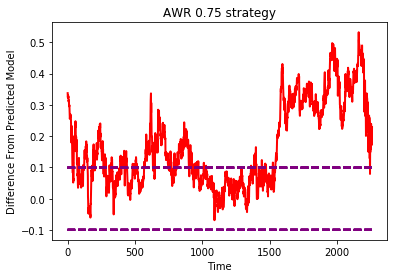

In [163]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('AWR 0.75 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

_Amount of signals for each pair_

CTWS

In [164]:
ctws_signals = pd.DataFrame({'δi': (0.25, 0.50, 0.75), 'Buy Signals': (0.0, 0.0, 0.0), 'Sell Signals': (0.0, 0.0, 0.0)})

In [250]:
rawData_last['Buy'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] < lower_bound_25_ctws:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] < lower_bound_25_ctws:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [231]:
rawData_last['Sell'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] > upper_bound_25_ctws:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] > upper_bound_25_ctws:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [256]:
ctws_buy = rawData_last.loc[rawData_last['Buy'] == 'YES']
ctws_exit_buy = rawData_last.loc[rawData_last['Buy'] == 'EXIT BUY']

ctws_buy.reset_index(inplace=True)
ctws_exit_buy.reset_index(inplace=True)

ctws_sell = rawData_last.loc[rawData_last['Sell'] == 'YES']
ctws_exit_sell = rawData_last.loc[rawData_last['Sell'] == 'EXIT SELL']

ctws_sell.reset_index(inplace=True)
ctws_exit_sell.reset_index(inplace=True)

In [168]:
ctws_signals['Buy Signals'][0] = rawData_last.loc[(rawData_last['PERMNO'] == 26463) & (rawData_last['Buy'] == 'YES')].count()[0]
ctws_signals['Sell Signals'][0] = rawData_last.loc[(rawData_last['PERMNO'] == 26463) & (rawData_last['Sell'] == 'YES')].count()[0]

In [169]:
rawData_last['Buy'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] < lower_bound_50_ctws:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] < lower_bound_50_ctws:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [170]:
rawData_last['Sell'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] > upper_bound_50_ctws:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] > upper_bound_50_ctws:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [171]:
ctws_signals['Buy Signals'][1] = rawData_last.loc[(rawData_last['PERMNO'] == 26463) & (rawData_last['Buy'] == 'YES')].count()[0]
ctws_signals['Sell Signals'][1] = rawData_last.loc[(rawData_last['PERMNO'] == 26463) & (rawData_last['Sell'] == 'YES')].count()[0]

In [172]:
rawData_last['Buy'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] < lower_bound_75_ctws:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] < lower_bound_75_ctws:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [173]:
rawData_last['Sell'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] > upper_bound_75_ctws:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] > upper_bound_75_ctws:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [174]:
ctws_signals['Buy Signals'][2] = rawData_last.loc[(rawData_last['PERMNO'] == 26463) & (rawData_last['Buy'] == 'YES')].count()[0]
ctws_signals['Sell Signals'][2] = rawData_last.loc[(rawData_last['PERMNO'] == 26463) & (rawData_last['Sell'] == 'YES')].count()[0]

In [175]:
ctws_signals

δi  Buy Signals  Sell Signals
0  0.25          8.0           3.0
1  0.50          4.0           2.0
2  0.75          4.0           1.0

WTR

In [176]:
wtr_signals = pd.DataFrame({'δi': (0.25, 0.50, 0.75), 'Buy Signals': (0.0, 0.0, 0.0), 'Sell Signals': (0.0, 0.0, 0.0)})

In [232]:
rawData_last['Buy'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] < lower_bound_25_wtr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] < lower_bound_25_wtr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [233]:
rawData_last['Sell'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] > upper_bound_25_wtr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] > upper_bound_25_wtr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [179]:
wtr_buy = rawData_last.loc[rawData_last['Buy'] == 'YES']
wtr_exit_buy = rawData_last.loc[rawData_last['Buy'] == 'EXIT BUY']

wtr_buy.reset_index(inplace=True)
wtr_exit_buy.reset_index(inplace=True)

wtr_sell = rawData_last.loc[rawData_last['Sell'] == 'YES']
wtr_exit_sell = rawData_last.loc[rawData_last['Sell'] == 'EXIT SELL']

wtr_sell.reset_index(inplace=True)
wtr_exit_sell.reset_index(inplace=True)

In [180]:
wtr_signals['Buy Signals'][0] = rawData_last.loc[(rawData_last['PERMNO'] == 52898) & (rawData_last['Buy'] == 'YES')].count()[0]
wtr_signals['Sell Signals'][0] = rawData_last.loc[(rawData_last['PERMNO'] == 52898) & (rawData_last['Sell'] == 'YES')].count()[0]

In [181]:
rawData_last['Buy'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] < lower_bound_50_wtr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] < lower_bound_50_wtr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [182]:
rawData_last['Sell'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] > upper_bound_50_wtr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] > upper_bound_50_wtr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [183]:
wtr_signals['Buy Signals'][1] = rawData_last.loc[(rawData_last['PERMNO'] == 52898) & (rawData_last['Buy'] == 'YES')].count()[0]
wtr_signals['Sell Signals'][1] = rawData_last.loc[(rawData_last['PERMNO'] == 52898) & (rawData_last['Sell'] == 'YES')].count()[0]

In [184]:
rawData_last['Buy'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] < lower_bound_75_wtr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] < lower_bound_75_wtr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [185]:
rawData_last['Sell'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] > upper_bound_75_wtr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] > upper_bound_75_wtr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [186]:
wtr_signals['Buy Signals'][2] = rawData_last.loc[(rawData_last['PERMNO'] == 52898) & (rawData_last['Buy'] == 'YES')].count()[0]
wtr_signals['Sell Signals'][2] = rawData_last.loc[(rawData_last['PERMNO'] == 52898) & (rawData_last['Sell'] == 'YES')].count()[0]

In [187]:
wtr_signals

δi  Buy Signals  Sell Signals
0  0.25         12.0           4.0
1  0.50          3.0           3.0
2  0.75          1.0           2.0

AWR

In [188]:
awr_signals = pd.DataFrame({'δi': (0.25, 0.50, 0.75), 'Buy Signals': (0.0, 0.0, 0.0), 'Sell Signals': (0.0, 0.0, 0.0)})

In [189]:
rawData_last['Buy'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] < lower_bound_25_awr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] < lower_bound_25_awr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [190]:
rawData_last['Sell'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] > upper_bound_25_awr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] > upper_bound_25_awr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [191]:
awr_buy = rawData_last.loc[rawData_last['Buy'] == 'YES']
awr_exit_buy = rawData_last.loc[rawData_last['Buy'] == 'EXIT BUY']

awr_buy.reset_index(inplace=True)
awr_exit_buy.reset_index(inplace=True)

awr_sell = rawData_last.loc[rawData_last['Sell'] == 'YES']
awr_exit_sell = rawData_last.loc[rawData_last['Sell'] == 'EXIT SELL']

awr_sell.reset_index(inplace=True)
awr_exit_sell.reset_index(inplace=True)

In [192]:
awr_signals['Buy Signals'][0] = rawData_last.loc[(rawData_last['PERMNO'] == 71475) & (rawData_last['Buy'] == 'YES')].count()[0]
awr_signals['Sell Signals'][0] = rawData_last.loc[(rawData_last['PERMNO'] == 71475) & (rawData_last['Sell'] == 'YES')].count()[0]

In [193]:
rawData_last['Buy'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] < lower_bound_50_awr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] < lower_bound_50_awr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [194]:
rawData_last['Sell'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] > upper_bound_50_awr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] > upper_bound_50_awr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [195]:
awr_signals['Buy Signals'][1] = rawData_last.loc[(rawData_last['PERMNO'] == 71475) & (rawData_last['Buy'] == 'YES')].count()[0]
awr_signals['Sell Signals'][1] = rawData_last.loc[(rawData_last['PERMNO'] == 71475) & (rawData_last['Sell'] == 'YES')].count()[0]

In [196]:
rawData_last['Buy'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] < lower_bound_75_awr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] < lower_bound_75_awr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [197]:
rawData_last['Sell'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] > upper_bound_75_awr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] > upper_bound_75_awr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [198]:
awr_signals['Buy Signals'][2] = rawData_last.loc[(rawData_last['PERMNO'] == 71475) & (rawData_last['Buy'] == 'YES')].count()[0]
awr_signals['Sell Signals'][2] = rawData_last.loc[(rawData_last['PERMNO'] == 71475) & (rawData_last['Sell'] == 'YES')].count()[0]

In [199]:
awr_signals

δi  Buy Signals  Sell Signals
0  0.25         12.0           6.0
1  0.50          8.0           1.0
2  0.75          7.0           0.0

_Length/Gain(Loss) of each first buy/sell_

Buy CTWS

In [258]:
ctws_buy['date'][0] = datetime.strptime(str(ctws_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
ctws_exit_buy['date'][0] = datetime.strptime(str(ctws_exit_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

ctws_buy['date'][0] = datetime.strptime(ctws_buy['date'][0], "%Y/%m/%d")
ctws_exit_buy['date'][0] = datetime.strptime(ctws_exit_buy['date'][0], "%Y/%m/%d")

Round_Trip_Buy_ctws = abs((ctws_buy['date'][0] - ctws_exit_buy['date'][0]).days)

Profit_ctws = ctws_exit_buy['PRC'][0] - ctws_buy['PRC'][0]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\Tyson\Anaconda3\lib\

In [259]:
print(f"The first buy trade at δ1 = 0.25 for CTWS was {Round_Trip_Buy_ctws:0.0f} days and resulted in a profit of ${Profit_ctws: 0.2f}")

The first buy trade at δ1 = 0.25 for CTWS was 27 days and resulted in a profit of $ 0.58


Sell CTWS

In [202]:
ctws_sell['date'][0] = datetime.strptime(str(ctws_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
ctws_exit_sell['date'][0] = datetime.strptime(str(ctws_exit_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

ctws_sell['date'][0] = datetime.strptime(ctws_sell['date'][0], "%Y/%m/%d")
ctws_exit_sell['date'][0] = datetime.strptime(ctws_exit_sell['date'][0], "%Y/%m/%d")

Round_Trip_Sell_ctws = abs((ctws_sell['date'][0] - ctws_exit_sell['date'][0]).days)

Profit_ctws = ctws_sell['PRC'][0] - ctws_exit_sell['PRC'][0]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\Tyson\Anaconda3\lib\

In [235]:
print(f"The first sell trade at δ1 = 0.25 for CTWS was {Round_Trip_Sell_ctws:0.0f} days and resulted in a profit of ${Profit_ctws: 0.2f}")

The first sell trade at δ1 = 0.25 for CTWS was 27 days and resulted in a profit of $-0.58


Buy WTR

In [236]:
wtr_buy['date'][0] = datetime.strptime(str(wtr_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
wtr_exit_buy['date'][0] = datetime.strptime(str(wtr_exit_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

wtr_buy['date'][0] = datetime.strptime(wtr_buy['date'][0], "%Y/%m/%d")
wtr_exit_buy['date'][0] = datetime.strptime(wtr_exit_buy['date'][0], "%Y/%m/%d")

Round_Trip_Buy_wtr = abs((wtr_buy['date'][0] - wtr_exit_buy['date'][0]).days)

Profit_wtr = wtr_exit_buy['PRC'][0] - wtr_buy['PRC'][0]

ValueError: time data '2000-05-05 00:00:00' does not match format '%Y%m%d'

In [241]:
print(f"The first buy trade at δ1 = 0.25 for WTR was {Round_Trip_Buy_wtr:0.0f} days and resulted in a profit of ${Profit_wtr: 0.2f}")

The first buy trade at δ1 = 0.25 for WTR was 3 days and resulted in a profit of $-0.31


Sell WTR

In [238]:
wtr_sell['date'][0] = datetime.strptime(str(wtr_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
wtr_exit_sell['date'][0] = datetime.strptime(str(wtr_exit_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

wtr_sell['date'][0] = datetime.strptime(wtr_sell['date'][0], "%Y/%m/%d")
wtr_exit_sell['date'][0] = datetime.strptime(wtr_exit_sell['date'][0], "%Y/%m/%d")

Round_Trip_Sell_wtr = abs((wtr_sell['date'][0] - wtr_exit_sell['date'][0]).days)

Profit_wtr = wtr_sell['PRC'][0] - wtr_exit_sell['PRC'][0]

ValueError: time data '2000-01-03 00:00:00' does not match format '%Y%m%d'

In [243]:
print(f"The first sell trade at δ1 = 0.25 for WTR was {Round_Trip_Sell_wtr:0.0f} days and resulted in a profit of ${Profit_wtr: 0.2f}")

The first sell trade at δ1 = 0.25 for WTR was 107 days and resulted in a profit of $-1.19


Buy AWR

In [234]:
awr_buy['date'][0] = datetime.strptime(str(awr_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
awr_exit_buy['date'][0] = datetime.strptime(str(awr_exit_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

awr_buy['date'][0] = datetime.strptime(awr_buy['date'][0], "%Y/%m/%d")
awr_exit_buy['date'][0] = datetime.strptime(awr_exit_buy['date'][0], "%Y/%m/%d")

Round_Trip_Buy_awr = abs((awr_buy['date'][0] - awr_exit_buy['date'][0]).days)

Profit_awr = awr_exit_buy['PRC'][0] - awr_buy['PRC'][0]

ValueError: time data '2000-01-03 00:00:00' does not match format '%Y%m%d'

In [ ]:
print(f"The first buy trade at δ1 = 0.25 for AWR was {Round_Trip_Buy_awr:0.0f} days and resulted in a profit of ${Profit_awr: 0.2f}")

Sell AWR

In [ ]:
awr_sell['date'][0] = datetime.strptime(str(awr_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
awr_exit_sell['date'][0] = datetime.strptime(str(awr_exit_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

awr_sell['date'][0] = datetime.strptime(awr_sell['date'][0], "%Y/%m/%d")
awr_exit_sell['date'][0] = datetime.strptime(awr_exit_sell['date'][0], "%Y/%m/%d")

Round_Trip_Sell_awr = abs((awr_sell['date'][0] - awr_exit_sell['date'][0]).days)

Profit_awr = awr_sell['PRC'][0] - awr_exit_sell['PRC'][0]

In [ ]:
print(f"The first sell trade at δ1 = 0.25 for AWR was {Round_Trip_Sell_awr:0.0f} days and resulted in a profit of ${Profit_awr: 0.2f}")

__This next part you don't have to look at and is the trading strategy, but I put in too much time and effort to just delete it__

__Intercepts and Coefficients__

In [36]:
ctws_first_series = pd.Series(abs(ctwsData_first.nplog))
wtr_first_series = pd.Series(wtrData_first.nplog)
awr_first_series = pd.Series(awrData_first.nplog)

reshaped_ctws_first = ctws_first_series.values.reshape(757, 1)
reshaped_wtr_first = wtr_first_series.values.reshape(757, 1)
reshaped_awr_first = awr_first_series.values.reshape(757, 1)

In [37]:
model_ctws = LinearRegression(fit_intercept=True)
int_ctws = model_ctws.fit(reshaped_ctws_first, reshaped_wtr_first).intercept_
coef_ctws = model_ctws.fit(reshaped_ctws_first, reshaped_wtr_first).coef_

model_wtr = LinearRegression(fit_intercept=True)
int_wtr = model_wtr.fit(reshaped_wtr_first, reshaped_awr_first).intercept_
coef_wtr = model_wtr.fit(reshaped_wtr_first, reshaped_awr_first).coef_

model_awr = LinearRegression(fit_intercept=True)
int_awr = model_ctws.fit(reshaped_awr_first, reshaped_ctws_first).intercept_
coef_awr = model_ctws.fit(reshaped_awr_first, reshaped_ctws_first).coef_

__Predicted Values__

In [38]:
rawData_last['predicted'] = 0.0
predicted_value_ctws = np.empty(2263)
for i in range(0, 2263):
    predicted_value_ctws[i] = (int_awr[0] + (coef_awr[0,0] * awrData_last.loc[i]['nplog']))
    rawData_last.at[i, 'predicted'] = predicted_value_ctws[i]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
predicted_value_wtr = np.empty(2263)
for i in range(0, 2263):
    predicted_value_wtr[i] = (int_ctws[0] + (coef_ctws[0,0] * ctwsData_last.loc[i]['nplog']))
    rawData_last.at[(i+2263), 'predicted'] = predicted_value_wtr[i]

In [40]:
predicted_value_awr = np.empty(2263)
for i in range(0, 2263):
    predicted_value_awr[i] = (int_wtr[0] + (coef_wtr[0,0] * wtrData_last.loc[i]['nplog']))
    rawData_last.at[(i+4526), 'predicted'] = predicted_value_awr[i]

__Difference From Predicted Values__

In [41]:
rawData_last['dif_predicted'] = 0.0

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(0, 6789):
    rawData_last['dif_predicted'][i] = rawData_last['nplog'][i] - rawData_last['predicted'][i]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
permno = [26463, 52898, 71475]

ind = rawData_last.PERMNO == permno[0]
ctwsData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[1]
wtrData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[2]
awrData_last = rawData_last[ind]

__WTR & CTWS Strategy__

In [ ]:
multiple = [0.25, 0.50, 0.75]

__WTR Bounds__

In [ ]:
e_wtr = np.sqrt(np.var((wtrData_last.dif_predicted)))
np.mean(np.abs(wtrData_last.dif_predicted))

In [ ]:
upper_bound_25_wtr = multiple[0] * e_wtr
lower_bound_25_wtr = -multiple[0] * e_wtr
upper_bound_50_wtr = multiple[1] * e_wtr
lower_bound_50_wtr = -multiple[1] * e_wtr
upper_bound_75_wtr = multiple[2] * e_wtr
lower_bound_75_wtr = -multiple[2] * e_wtr

__CTWS Bounds__

In [48]:
e_ctws = np.sqrt(np.var((ctwsData_last.dif_predicted)))
np.mean(np.abs(ctwsData_last.dif_predicted))

0.13670592721226152

In [49]:
upper_bound_25_ctws = multiple[0] * e_ctws
lower_bound_25_ctws = -multiple[0] * e_ctws
upper_bound_50_ctws = multiple[1] * e_ctws
lower_bound_50_ctws = -multiple[1] * e_ctws
upper_bound_75_ctws = multiple[2] * e_ctws
lower_bound_75_ctws = -multiple[2] * e_ctws

__Amount of Shares to Short__

In [50]:
short_wtr_on_ctws = np.empty(3020)
for i in range(0, 3020):
    short_wtr_on_ctws[i] = 1000 * (ctwsData.nplog[i]/wtrData.nplog[i+3020])

In [51]:
short_ctws_on_wtr = np.empty(3020)
for i in range(0, 3020):
    short_ctws_on_wtr[i] = 1000 * (wtrData.nplog[i+3020]/ctwsData.nplog[i])

__Long CTWS Short WTR__

__Long CTWS Code__

In [52]:
rawData_last['Buy'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] > upper_bound_25_ctws:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] > upper_bound_25_ctws:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

__Long CTWS Results__

In [53]:
ctws_buy = rawData_last.loc[rawData_last['Buy'] == 'YES']
ctws_exit_buy = rawData_last.loc[rawData_last['Buy'] == 'EXIT BUY']

In [54]:
n = ctws_exit_buy.nplog.count()
ctws_buy_gains = np.empty(n)

for i in range(0, n):
    ctws_buy_gains[i] = (ctws_buy.PRC.values[i] - ctws_exit_buy.PRC.values[i]) / ctws_buy.PRC.values[i]

In [84]:
ctws_buy_gains.mean()

0.06352165741725663

__CTWS Round Trip Calculation__

In [ ]:
ctws_buy.reset_index(inplace=True)
ctws_exit_buy.reset_index(inplace=True)

In [56]:
for i in range(0, n):
    ctws_buy['date'][i] = datetime.strptime(str(ctws_buy['date'][i]), '%Y%m%d').strftime('%Y/%m/%d')
    
for i in range(0, n-1):
    ctws_exit_buy['date'][i] = datetime.strptime(str(ctws_exit_buy['date'][i]), '%Y%m%d').strftime('%Y/%m/%d')

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\Tyson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:

In [66]:
for i in range(0, n):
    ctws_buy['date'][i] = datetime.strptime(ctws_buy['date'][i], "%Y/%m/%d")
    ctws_exit_buy['date'][i] = datetime.strptime(ctws_exit_buy['date'][i], "%Y/%m/%d")

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: strptime() argument 1 must be str, not int

In [71]:
Round_Trip_ctws = np.empty(n)

for i in range(0, n-1):
    Round_Trip[i] = abs((ctws_buy['date'][i] - ctws_exit_buy['date'][i]).days)

Round_Trip_ctws = pd.DataFrame(Round_Trip_ctws)

__Short WTR Code__

In [86]:
rawData_last['Sell'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] < lower_bound_25_wtr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] < lower_bound_25_wtr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

__Short WTR Results__

In [88]:
wtr_sell = rawData_last.loc[rawData_last['Sell'] == 'YES']
wtr_exit_sell = rawData_last.loc[rawData_last['Sell'] == 'EXIT SELL']

In [92]:
n = wtr_exit_sell.nplog.count()
wtr_sell_gains = np.empty(n)

for i in range(0, n):
    wtr_sell_gains[i] = (wtr_sell.PRC.values[i] - wtr_exit_sell.PRC.values[i]) / wtr_sell.PRC.values[i]

In [94]:
wtr_sell_gains.mean()

-0.069870968997243

__Long WTR Short CTWS__

__Long WTR Code__

In [ ]:
rawData['Buy'] = 0

for i in range(3020, 3021):
    if rawData['dif_predicted'][i] > upper_bound_25_wtr:
        rawData['Buy'][i] = 'YES'
    else:
        rawData['Buy'][i] = 'NO'

for i in range(3021, 6040):
    if rawData['dif_predicted'][i] > upper_bound_25_wtr:
        if rawData['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData['Buy'][i] = 'HOLD BUY'
        else:
            rawData['Buy'][i] = 'YES'
    else:
        if rawData['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData['dif_predicted'][i] > 0:
                if rawData['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData['Buy'][i] = 'HOLD BUY'
                else:
                    rawData['Buy'][i] = 'NO'
            else:
                    rawData['Buy'][i] = 'EXIT BUY'
        else:
            rawData['Buy'][i] = 'NO'

__Long WTR Results__

In [47]:
wtr_buy = rawData.loc[rawData['Buy'] == 'YES']
wtr_exit_buy = rawData.loc[rawData['Buy'] == 'EXIT BUY']

In [48]:
n = wtr_exit_buy.nplog.count()
wtr_buy_gains = np.empty(n)

for i in range(0, n):
    wtr_buy_gains[i] = (wtr_buy.PRC.values[i] - wtr_exit_buy.PRC.values[i]) / wtr_buy.PRC.values[i]

__Short CTWS Code__

In [49]:
rawData['Sell'] = 0

for i in range(0, 1):
    if rawData['dif_predicted'][i] < lower_bound_25_ctws:
        rawData['Sell'][i] = 'YES'
    else:
        rawData['Sell'][i] = 'NO'

for i in range(3021, 6040):
    if rawData['dif_predicted'][i] < lower_bound_25_ctws:
        if rawData['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData['Sell'][i] = 'HOLD SELL'
        else:
            rawData['Sell'][i] = 'YES'
    else:
        if rawData['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData['dif_predicted'][i] < 0:
                if rawData['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData['Sell'][i] = 'HOLD SELL'
                else:
                    rawData['Sell'][i] = 'NO'
            else:
                    rawData['Sell'][i] = 'EXIT SELL'
        else:
            rawData['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarn

__Short CTWS Results__

In [50]:
ctws_sell = rawData.loc[rawData['Sell'] == 'YES']
ctws_exit_sell = rawData.loc[rawData['Sell'] == 'EXIT SELL']

In [51]:
n = ctws_exit_sell.nplog.count()
ctws_sell_gains = np.empty(n)

for i in range(0, n):
    ctws_sell_gains[i] = (ctws_sell.PRC.values[i] - ctws_exit_sell.PRC.values[i]) / ctws_sell.PRC.values[i]

__Final Results__

In [52]:
data = [['L_CTWS', ctws_buy.nplog.count(), ctws_buy_gains.mean(), ctws_buy_gains.std(), 0, ctws_buy_gains.max(), ctws_buy_gains.min(), ctws_buy_gains.sum(), '-'],\
['S_WTR', wtr_sell.nplog.count(), wtr_sell_gains.mean(), wtr_sell_gains.std(), 0, wtr_sell_gains.max(), wtr_sell_gains.min(), wtr_sell_gains.sum(), '-'], \
['L_WTR', wtr_buy.nplog.count(), wtr_buy_gains.mean(), wtr_buy_gains.std(), 0, wtr_buy_gains.max(), wtr_buy_gains.min(), wtr_buy_gains.sum(), '-'],\
['S_CTWS', ctws_sell.nplog.count(), ctws_sell_gains.mean(), ctws_sell_gains.std(), 0, ctws_sell_gains.max(), ctws_sell_gains.min(), ctws_sell_gains.sum(), ctws_buy_gains.sum() + wtr_sell_gains.sum() + wtr_buy_gains.sum() + ctws_sell_gains.sum()]] 
  
results = pd.DataFrame(data, columns = ['Position', 'Count', 'Mean', 'St. Dev', 'Median', 'Max', 'Min', 'Position Total', 'Strategy Total']) 

In [53]:
results

Position  Count      Mean   St. Dev  Median       Max       Min  \
0   L_CTWS     31  0.055750  0.021524       0  0.119862  0.021739   
1    S_WTR     30 -0.074494  0.042570       0 -0.038763 -0.236246   
2    L_WTR     35  0.069018  0.029969       0  0.180371  0.040000   
3   S_CTWS     34 -0.065089  0.039385       0 -0.036919 -0.236246   

   Position Total Strategy Total  
0        1.728249              -  
1       -2.160332              -  
2        2.415645              -  
3       -2.147935      -0.164374